# Knn Regression

1. Choose K (the number of clusters you want).

2. Initialize K centroids randomly.

3. Repeat until convergence:
   a. Assign each data point to the nearest centroid.
   b. Recalculate the centroids based on the current assignment of data points.
   
4. Return the final K centroids and the corresponding cluster assignments.


In [347]:
# import modules 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

In [348]:
df = pd.read_csv('../cleaning-preprocessing/cleaned_flight_data_with_target.csv')
# df.head(5)

In [349]:
df = df.astype(int)
# df.head(5)

In [350]:
print(df['DEP_DELAY'].skew())  # If > 0.5 or < -0.5, transformation is needed

df['DEP_DELAY_log'] = np.log1p(df['DEP_DELAY'])  # log1p avoids log(0) issue
# df['DEP_DELAY_sqrt'] = np.sqrt(df['DEP_DELAY']) # sqrt version

df['DEP_DELAY_shifted'] = df['DEP_DELAY'] - df['DEP_DELAY'].min() + 1
df['DEP_DELAY_log'] = np.log1p(df['DEP_DELAY_shifted'])

import matplotlib.pyplot as plt
import seaborn as sns

# fig, axes = plt.subplots(1, 3, figsize=(15, 5))

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(df['DEP_DELAY'], kde=True, ax=axes[0])
axes[0].set_title('Original')

sns.histplot(df['DEP_DELAY_log'], kde=True, ax=axes[1])
axes[1].set_title('Log Transformed')

# sns.histplot(df['DEP_DELAY_sqrt'], kde=True, ax=axes[2])
# axes[2].set_title('Square Root Transformed')

plt.show()

In [ ]:
df['CRS_DEP_M_log'] = np.log1p(df['CRS_DEP_M'])  # log1p avoids log(0) issue
df['Wind_Speed_log'] = np.log1p(df['Wind Speed'])  # log1p avoids log(0) issue
df['MONTH_log'] = np.log1p(df['MONTH'])  # log1p avoids log(0) issue

df['CRS_ARR_M_log'] = np.log1p(df['CRS_ARR_M'])  # log1p avoids log(0) issue
df['DAY_OF_MONTH_log'] = np.log1p(df['DAY_OF_MONTH'])  # log1p avoids log(0) issue
df['Wind_Gust_log'] = np.log1p(df['Wind Gust'])  # log1p avoids log(0) issue

df['Pressure_log'] = np.log1p(df['Pressure'])  # log1p avoids log(0) issue
df['Condition_Light Snow / Windy_log'] = np.log1p(df['Condition_Light Snow / Windy'])  # log1p avoids log(0) issue
df['Condition_Rain_log'] = np.log1p(df['Condition_Rain'])  # log1p avoids log(0) issue

df['OP_UNIQUE_CARRIER_MQ_log'] = np.log1p(df['OP_UNIQUE_CARRIER_MQ'])  # log1p avoids log(0) issue
df['DEST_LAX_log'] = np.log1p(df['DEST_LAX'])  # log1p avoids log(0) issue
df['Temperature_log'] = np.log1p(df['Temperature'])  # log1p avoids log(0) issue

df['Condition_Mostly_Cloudy_log'] = np.log1p(df['Condition_Mostly Cloudy'])  # log1p avoids log(0) issue
df['Condition_Heavy_Rain_log'] = np.log1p(df['Condition_Heavy Rain'])  # log1p avoids log(0) issue
# df['Condition_Partly Cloudy / Windy_log'] = np.log1p(df['Condition_Partly Cloudy / Windy'])  # log1p avoids log(0) issue


In [ ]:
X = df.drop(columns=['DEP_DELAY_log','DEP_DELAY','DEP_DELAY_shifted', 'CRS_DEP_M','Wind Speed','MONTH','CRS_ARR_M', 'DAY_OF_MONTH','Wind Gust', 'Pressure','Condition_Light Snow / Windy', 'Condition_Rain', 'OP_UNIQUE_CARRIER_MQ', 'DEST_LAX', 'Temperature', 'Condition_Mostly Cloudy', 'Condition_Heavy Rain'])  # Feature matrix
y = df['DEP_DELAY_log']  # Target variable

y.head(5)

0    3.135494
1    2.833213
2    4.158883
3    3.091042
4    2.995732
Name: DEP_DELAY_log, dtype: float64

In [ ]:
# X = df.drop(columns=['DEP_DELAY_sqrt'])  # Feature matrix
# y = df['DEP_DELAY_sqrt']  # Target variable

# y.head(5)

In [ ]:
# X = df.drop(columns=['DEP_DELAY'])  # Feature matrix
# y = df['DEP_DELAY']  # Target variable

# y.head(5)


### Feature Selection

In [ ]:
X = X.applymap(lambda x: max(x, 0))
X = X.fillna(X.mean())

/var/folders/06/6rnd9mvj2tg64m2vg9cssn0w0000gn/T/ipykernel_12705/3256436071.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = X.applymap(lambda x: max(x, 0))


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SelectKBest with f_regression
k = 15  # Number of top features to select
selector = SelectKBest(score_func=f_regression, k=k)
X_selected = selector.fit_transform(X_scaled, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
feature_scores = selector.scores_[selector.get_support()]

# Create a DataFrame with feature names and scores
feature_df = pd.DataFrame({'Feature': selected_features, 'F-Score': feature_scores})
feature_df = feature_df.sort_values(by='F-Score', ascending=False)

# Print the selected features
print("Selected Features:")
print(feature_df)
# print(feature_df['Feature'])


Selected Features:
                         Feature     F-Score
2                      CRS_DEP_M  577.607926
5                     Wind Speed  246.111740
0                          MONTH  168.380578
3                      CRS_ARR_M  132.035004
1                   DAY_OF_MONTH  112.251706
6                      Wind Gust   96.341075
7                       Pressure   87.883327
12  Condition_Light Snow / Windy   68.504221
14                Condition_Rain   62.730453
11          Condition_Light Rain   54.590060
8           OP_UNIQUE_CARRIER_MQ   52.323078
9                       DEST_LAX   51.626808
4                    Temperature   47.383901
13       Condition_Mostly Cloudy   46.150628
10          Condition_Heavy Rain   43.661497


In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X[feature_df['Feature']], y, test_size = 0.20, random_state = 42)

In [ ]:
X_train

,CRS_DEP_M,Wind Speed,MONTH,CRS_ARR_M,DAY_OF_MONTH,Wind Gust,Pressure,Condition_Light Snow / Windy,Condition_Rain,Condition_Light Rain,OP_UNIQUE_CARRIER_MQ,DEST_LAX,Temperature,Condition_Mostly Cloudy,Condition_Heavy Rain
907,324,3,11,448,4,0,30,0,0,0,0,0,38,0,0
3899,400,20,11,592,13,0,30,0,0,0,0,0,23,0,0
17351,1193,10,12,1387,26,0,30,0,0,0,0,0,45,0,0
6880,1169,10,11,1302,21,0,30,0,0,0,0,0,49,0,0
19341,590,7,1,826,2,0,30,0,0,0,0,0,40,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,650,13,1,864,9,0,30,0,0,0,0,0,29,0,0
5390,869,22,11,1049,17,30,30,0,0,0,0,0,41,0,0
860,1225,14,11,1349,3,0,30,0,0,0,0,0,49,0,0
15795,1200,3,12,1306,21,0,30,0,0,0,0,0,33,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
# weights='distance'
regressor = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
regressor.fit(X_train, y_train)

KNeighborsRegressor(metric='manhattan')

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
# print(f"R-Squared (R2): {r2:.4f}")


Model Performance Metrics:
Mean Squared Error (MSE): 0.24
Mean Absolute Error (MAE): 0.32


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(3, 21, 2)}
grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='r2')
grid.fit(X_train, y_train)
print("Best k:", grid.best_params_)

Best k: {'n_neighbors': 5}


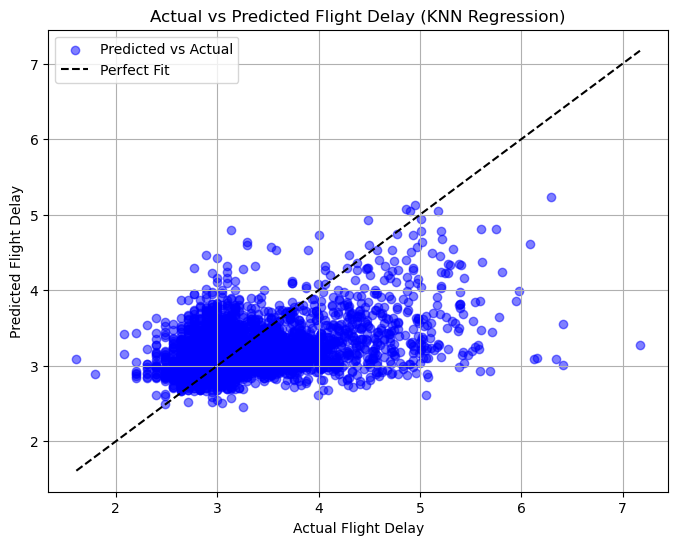

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', label="Perfect Fit")

plt.xlabel("Actual Flight Delay")
plt.ylabel("Predicted Flight Delay")
plt.title("Actual vs Predicted Flight Delay (KNN Regression)")
plt.legend()
plt.grid(True)
plt.show()